In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

In [2]:
df = pd.read_csv('iot23_combined.csv')

c:\users\shiv.gupta\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446621 entries, 0 to 1446620
Data columns (total 25 columns):
duration             1446621 non-null object
orig_bytes           1446621 non-null object
resp_bytes           1446621 non-null object
missed_bytes         1446621 non-null float64
orig_pkts            1446621 non-null float64
orig_ip_bytes        1446621 non-null float64
resp_pkts            1446621 non-null float64
resp_ip_bytes        1446621 non-null float64
label                1446621 non-null object
proto_icmp           1446621 non-null int64
proto_tcp            1446621 non-null int64
proto_udp            1446621 non-null int64
conn_state_OTH       1446621 non-null int64
conn_state_REJ       1446621 non-null int64
conn_state_RSTO      1446621 non-null int64
conn_state_RSTOS0    1446621 non-null int64
conn_state_RSTR      1446621 non-null int64
conn_state_RSTRH     1446621 non-null int64
conn_state_S0        1446621 non-null int64
conn_state_S1        1446621 non-null

In [25]:
display(df)

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0.003497,0,0,0.0,5.0,212.0,3.0,144.0,- benign -,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.036724,34,311,0.0,1.0,62.0,1.0,339.0,- benign -,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,384.518261,15072,0,0.0,48.0,16416.0,0.0,0.0,- benign -,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.270332,48,48,0.0,1.0,76.0,1.0,76.0,- benign -,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.111429,48,48,0.0,1.0,76.0,1.0,76.0,- benign -,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446616,-,-,-,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1446617,-,-,-,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1446618,-,-,-,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1446619,-,-,-,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
df.label.value_counts()

PartOfAHorizontalPortScan     825939
Okiru                         262690
Benign                        197809
DDoS                          138777
C&C                            15100
Attack                          3915
-   benign   -                  1947
C&C-HeartBeat                    349
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: label, dtype: int64

In [4]:
import networkx as nx

In [32]:
df.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'proto_icmp',
       'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ',
       'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR',
       'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
       'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR'],
      dtype='object')

In [67]:
G=nx.from_pandas_edgelist(df[:2000],'label', "duration", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

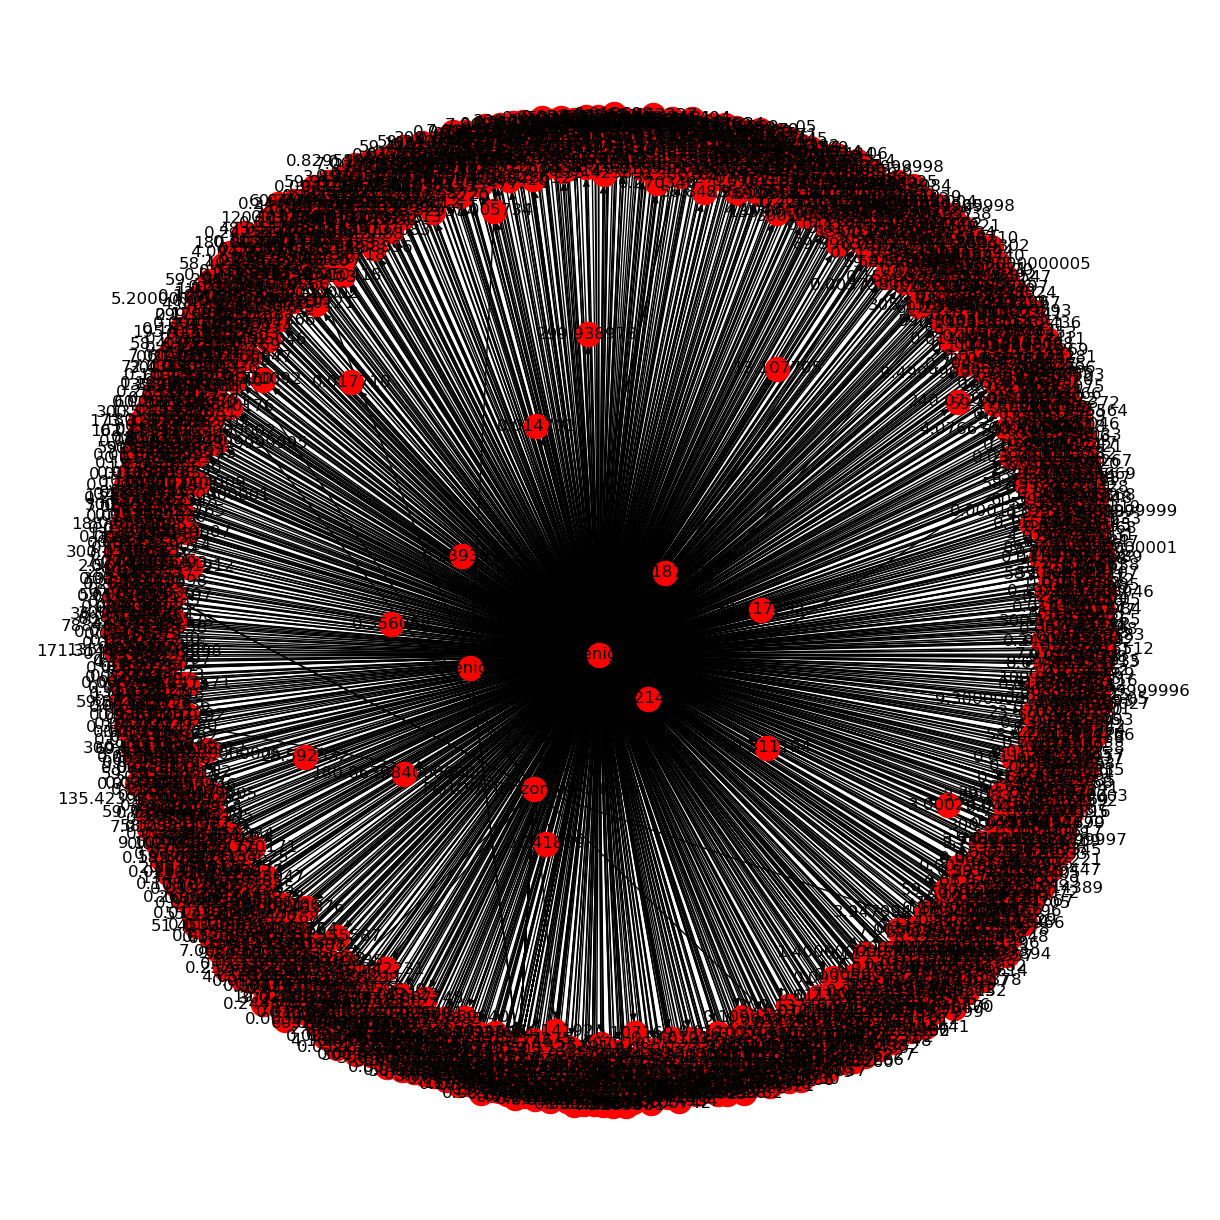

In [68]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()